# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.sample()

,Age,Tardies
1,51,1


Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

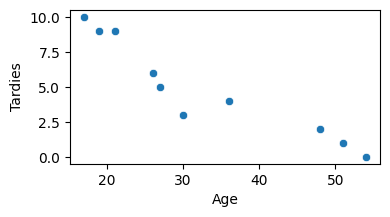

In [6]:
plt.figure(figsize = (4,2))
sns.scatterplot(data=student_data, x='Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

<u>MY COMMENTS</u> yes I do, the higher the age the less tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [9]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


<u>MY COMMENTS</u>
both parameters (covariance and correlation) describe the relationship between two variables. If possitive one variable increases if the other does and, if negative, one variable decreases if the other increases. The main difference between both parameters is that the correlation is normalized from -1 to +1 so, it is far easy to interpretate as it does not depend ond the value of the variables

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [18]:
lr = LinearRegression()
X = student_data[["Age"]]
y = student_data.Tardies

lr.fit(X, y) 

LinearRegression()

Plot your regression model on your scatter plot.

In [20]:
coef=lr.coef_
itcpt =lr.intercept_

In [22]:
student_data['tard_pred']=student_data['Age']*coef+itcpt
student_data.sample()

,Age,Tardies,tard_pred
0,17,10,8.76085


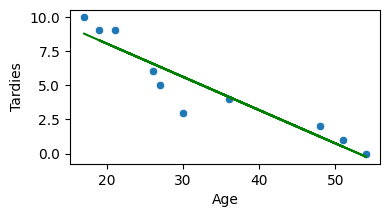

In [106]:
plt.figure(figsize = (4,2))
sns.scatterplot(data=student_data, x='Age', y='Tardies')
plt.plot(student_data.Age, student_data.tard_pred, c="green", label="Tardies prediction");


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [29]:
result = smf.ols("Tardies ~ Age", data = student_data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        15:41:36   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<u>MY COMMENTS</u>
my initial hypthesis is right and both variables are correlated. P_value obtain from linear regression model is really low confirming this correlation. The linear correlation tested has an R2 value  quite high (0.882) and coherent with the Adj. R-squared (0.867) so, it is a good model. Graphic, as last tests, shows good fitting between data and prediction line.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [37]:
pd.set_option('display.max_columns',None)

In [48]:
cars = pd.read_csv('vehicles.csv')
cars.columns = cars.columns.str.replace(' ', '_').str.replace('/','_')
cars.sample()

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
25316,Mitsubishi,Eclipse Spyder,2005,2.4,4.0,Manual 5-spd,Front-Wheel Drive,Minicompact Cars,Regular,14.33087,20,28,23,386.391304,1450


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [70]:
cars[['Year', 'Cylinders', 'Fuel_Barrels_Year', 'Combined_MPG', 'Fuel_Cost_Year','CO2_Emission_Grams_Mile']].corr()

,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,Fuel_Cost_Year,CO2_Emission_Grams_Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel_Barrels_Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel_Cost_Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2_Emission_Grams_Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


<u>MY COMMENTS</u>
For CO2_Emission the variable with highest impact is Fuel_Barrels_Year which is logic as the higest fuel consumption the highest contamination. As fuel_barrels_year is correlated with Fuel_cost_year then, there is also a correlation with this last variable with the CO2_emission. Combined_MPG also has an important impact but, unlike the previous variables, in this case, the correlation is negative. On the other hand Year has low impact.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [83]:
y=cars.CO2_Emission_Grams_Mile
X=cars[['Year', 'Cylinders', 'Fuel_Barrels_Year', 'Combined_MPG', 'Fuel_Cost_Year']]
lr_cars = LinearRegression()
lr_cars.fit(X, y) 

LinearRegression()

In [87]:
lr_cars.intercept_

769.8882836465227

In [84]:
lr_cars.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

<u>EQUATION</u> : 
CO2_Emission_Grams_Mile = 769.8882836465227-0.32061673*'Year' +  1.87879976*'Cylinders' + 19.05292507*'Fuel_Barrels_Year'-3.04039938*'Combined_MPG' + 0.03230948*'Fuel_Cost_Year'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [74]:
results = smf.ols("CO2_Emission_Grams_Mile ~ Year+Cylinders+ Fuel_Barrels_Year+ Combined_MPG+ Fuel_Cost_Year", data = cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             16:21:08   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<u>MY COMMETNS:</u> as expected the highest correlation is with Fuel_Barrels_Year and, the model applied (multiple linear correlation) has proven to be a very good one, not only because of the high R2 and Adj R2 obtained but because it "has been able" to detect the correlation between Fuel_Barrels_Year and Fuel_Cost_Year.

Contrary to what happened when we determined the correlation between different variables earlier, the current method indicates that the correlation between Fuel_Cost_Year and CO2_Emission_Grams_Mile is negligible. What the previous correlation table was actually showing us was the correlation between Fuel_Barrels_Year and Fuel_Cost_Year.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [179]:
data=({'x':[1,3,4,6,8,9,11,14],'y':[1,2,4,4,5,7,8,13]})
data=pd.DataFrame(data)
data

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [180]:
# X is the number of people I invited, and Y is the number of people who attended
x=data[['x']]
y=data.y
lr=LinearRegression().fit(x,y)

In [181]:
a=lr.intercept_
b=lr.coef_
data['y_calc']=data['x']*b+a
data.sample()

,x,y,y_calc
3,6,4,4.651515


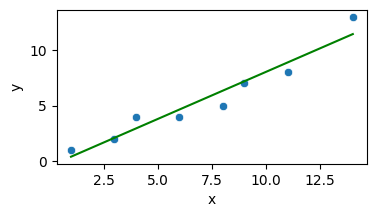

In [182]:
plt.figure(figsize=(4,2))
sns.scatterplot(data=data, x='x', y='y')
plt.plot(data.x, data.y_calc, c="green")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

<u>MY COMMETNS:</u> 
EQUATION : number of people who attended = 0.84848485 *people_invited -0.43939393939393945
As can see both from the above plot and from the summary below there is a clear relationship with the peple that you invite and the ones that attend. You're right regarding to the existance of a correlation but just the opposite of what you 
suspected as the more people you invite the more people attend to your party. YOUR PARTIES MUST BE JUST GREAT!! 

In [183]:
result2 = smf.ols('y ~ x', data=data).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000102
Time:                        17:33:39   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
x              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<Axes: >

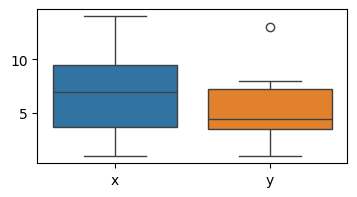

In [184]:
plt.figure(figsize=(4,2))
sns.boxplot(data=data[['x','y']])

In [185]:
#it seems there is one outlier
def outliers(df,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    irq = q3-q1
    upper_limit = q3+1.5*irq
    lower_limit = q1-1.5*irq
    outlier=(data[(df[column]>upper_limit)|(df[column]<lower_limit)])
    return outlier

In [186]:
outliers(data,'y')

,x,y,y_calc
7,14,13,11.439394


In [187]:
data = data.drop(index=7)

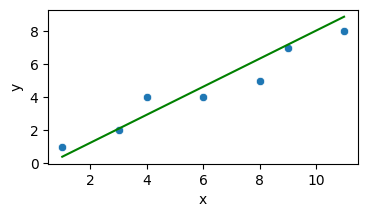

In [188]:
plt.figure(figsize=(4,2))
sns.scatterplot(data=data, x='x', y='y')
plt.plot(data.x, data.y_calc, c="green");

In [189]:
results3=smf.ols('y~x', data=data).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000264
Time:                        17:33:40   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.556      -0.996       1.642
x              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

<u>MY COMMETNS:</u> althouth R2 and Adj R2 have improved a little bit, the highest change, is in the interception point and the slope of the regression. In this case it is not a drastic problem but it could have been so, thus, a boxplot to detect outliers previous to any modelization should be always done.